# Imports og config

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler  # Normalization
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from minisom import MiniSom  # Self-Organizing Map
from mpl_toolkits.mplot3d import Axes3D
import skfuzzy as fuzz  # Fuzzy C-Means Clustering
from itertools import combinations
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
import numpy as np
from tabulate import tabulate

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

N_CLUSTERS = 4

df = pd.read_csv(os.path.join('..', '..', 'data', 'Social-media', 'OnlineNewsPopularity.csv'))

# ✅ Preprocess

## ✅ EDA

### ✅ vise columns

In [35]:
import pandas as pd
import math
import re

# Assuming you have your DataFrame named 'df'
# If not, replace this line with your actual DataFrame
# df = pd.read_csv('your_data.csv')

column_names = df.columns.tolist()

def escape_latex(text):
    """Escape special characters for LaTeX."""
    escapes = {
        '_': '\\_',
        '%': '\\%',
        '&': '\\&',
        '#': '\\#',
        '$': '\\$',
        '{': '\\{',
        '}': '\\}',
        '~': '\\textasciitilde{}',
        '^': '\\textasciicircum{}',
        '\\': '\\textbackslash{}',
    }
    return ''.join(escapes.get(c, c) for c in text)

# Calculate the number of rows needed for 3 columns
num_rows = math.ceil(len(column_names) / 3)

# Generate LaTeX code
latex_code = "\\begin{multicols}{3}\n\\begin{itemize}\n"

for i, col in enumerate(column_names):
    escaped_col = escape_latex(col)
    latex_code += f"    \\item {escaped_col}\n"
    # Add column break if needed
    if (i + 1) % num_rows == 0 and i != len(column_names) - 1:
        latex_code += "\\end{itemize}\n\\columnbreak\n\\begin{itemize}\n"

latex_code += "\\end{itemize}\n\\end{multicols}"

print(latex_code)

\begin{multicols}{3}
\begin{itemize}
    \item url
    \item timedelta
    \item n\_tokens\_title
    \item n\_tokens\_content
    \item n\_unique\_tokens
    \item n\_non\_stop\_words
    \item n\_non\_stop\_unique\_tokens
    \item num\_hrefs
    \item num\_self\_hrefs
    \item num\_imgs
    \item num\_videos
    \item average\_token\_length
    \item num\_keywords
    \item data\_channel\_is\_lifestyle
    \item  data\_channel\_is\_entertainment
    \item data\_channel\_is\_bus
    \item data\_channel\_is\_socmed
    \item data\_channel\_is\_tech
    \item data\_channel\_is\_world
    \item kw\_min\_min
    \item kw\_max\_min
\end{itemize}
\columnbreak
\begin{itemize}
    \item kw\_avg\_min
    \item kw\_min\_max
    \item kw\_max\_max
    \item kw\_avg\_max
    \item kw\_min\_avg
    \item kw\_max\_avg
    \item kw\_avg\_avg
    \item self\_reference\_min\_shares
    \item self\_reference\_max\_shares
    \item self\_reference\_avg\_sharess
    \item weekday\_is\_monday
    \item 

### ✅ vise duplicates

In [36]:
duplicate_count = df.duplicated().sum()
duplicate_summary = pd.DataFrame({
    'Description': ['Total Duplicate Rows'],
    'Count': [duplicate_count]
})
latex_table = tabulate(duplicate_summary, headers='keys', tablefmt='latex', showindex=False)
print(latex_table)

\begin{tabular}{lr}
\hline
 Description          &   Count \\
\hline
 Total Duplicate Rows &       0 \\
\hline
\end{tabular}


### ✅ vise missing values

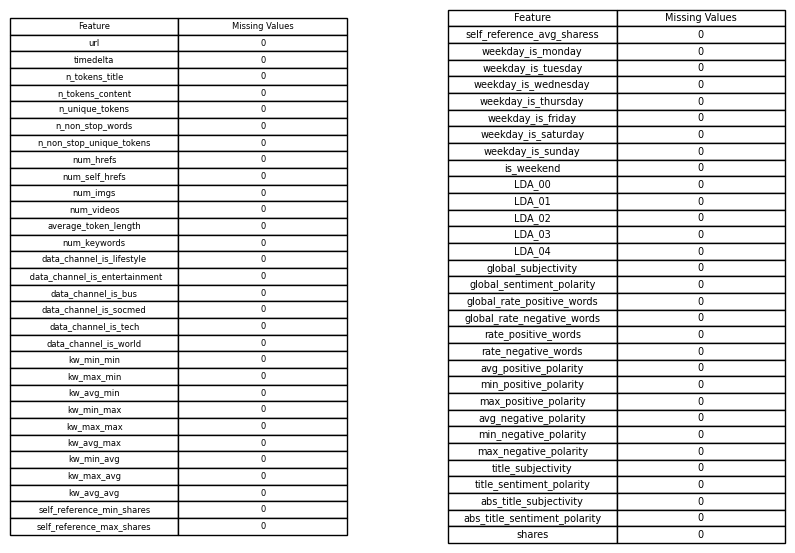

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (use your actual DataFrame)
# df = pd.DataFrame({...})

# Calculate missing values
missing_values = df.isnull().sum()

# Create a DataFrame for displaying the missing values in table format
missing_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Values': missing_values.values
})

# Split the DataFrame into two halves
mid_index = len(missing_df) // 2
left_table = missing_df.iloc[:mid_index]
right_table = missing_df.iloc[mid_index:]

# Create a figure to display the two tables side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the left table
axes[0].axis('off')
axes[0].table(cellText=left_table.values, colLabels=left_table.columns, cellLoc='center', loc='center')

# Plot the right table with a bit of space to the right
axes[1].axis('off')
axes[1].table(cellText=right_table.values, colLabels=right_table.columns, cellLoc='center', loc='center')

# Adjust spacing between the tables
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


## ✅ Fjerne outliers og vise fordeling

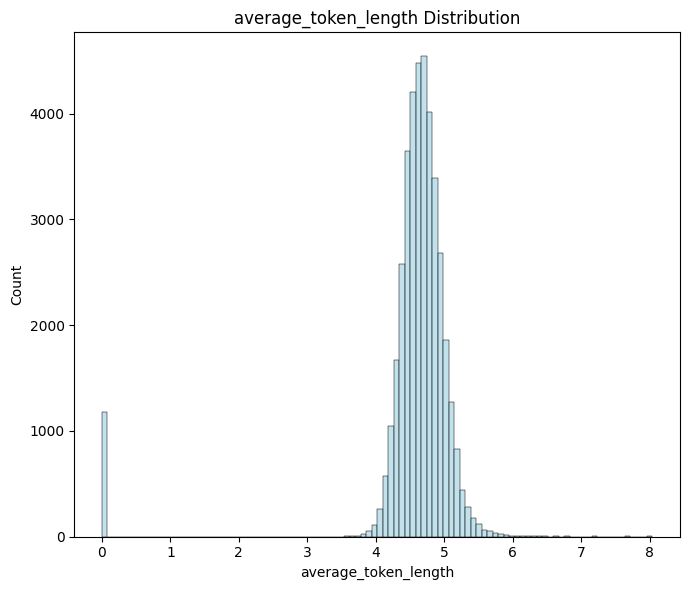

c:\IT3212\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 39644.
  res = hypotest_fun_out(*samples, **kwds)


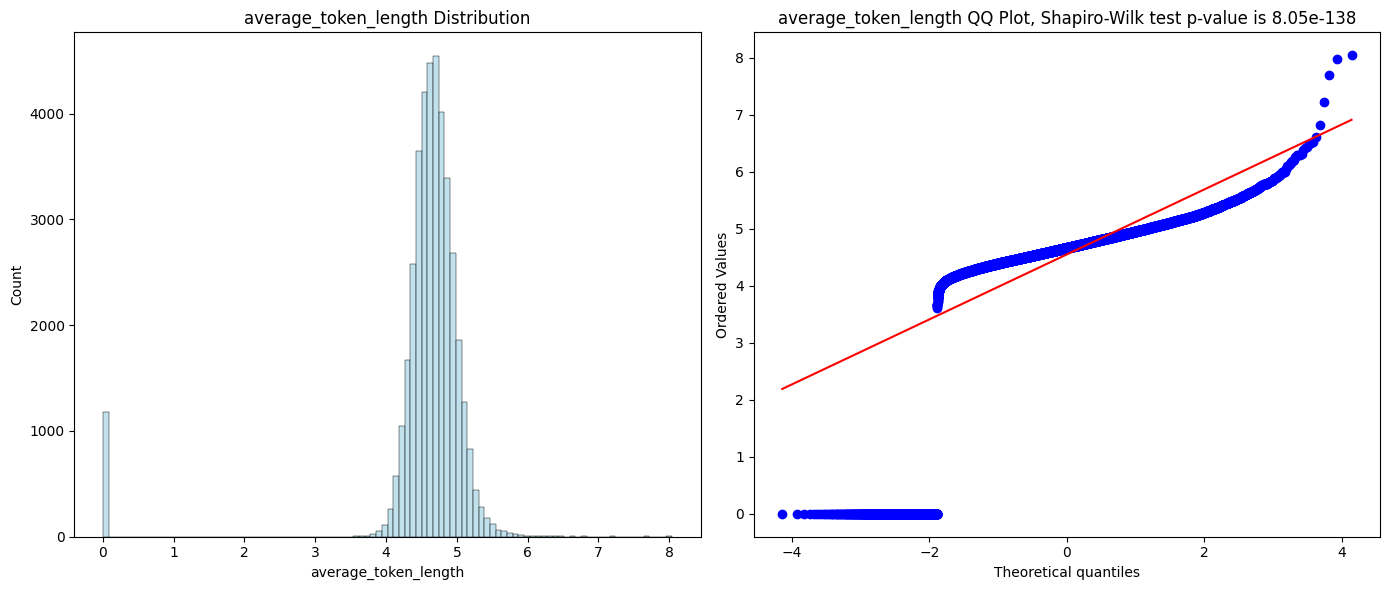

8.04711796066599e-138


C:\Users\ander\AppData\Local\Temp\ipykernel_12432\308483798.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


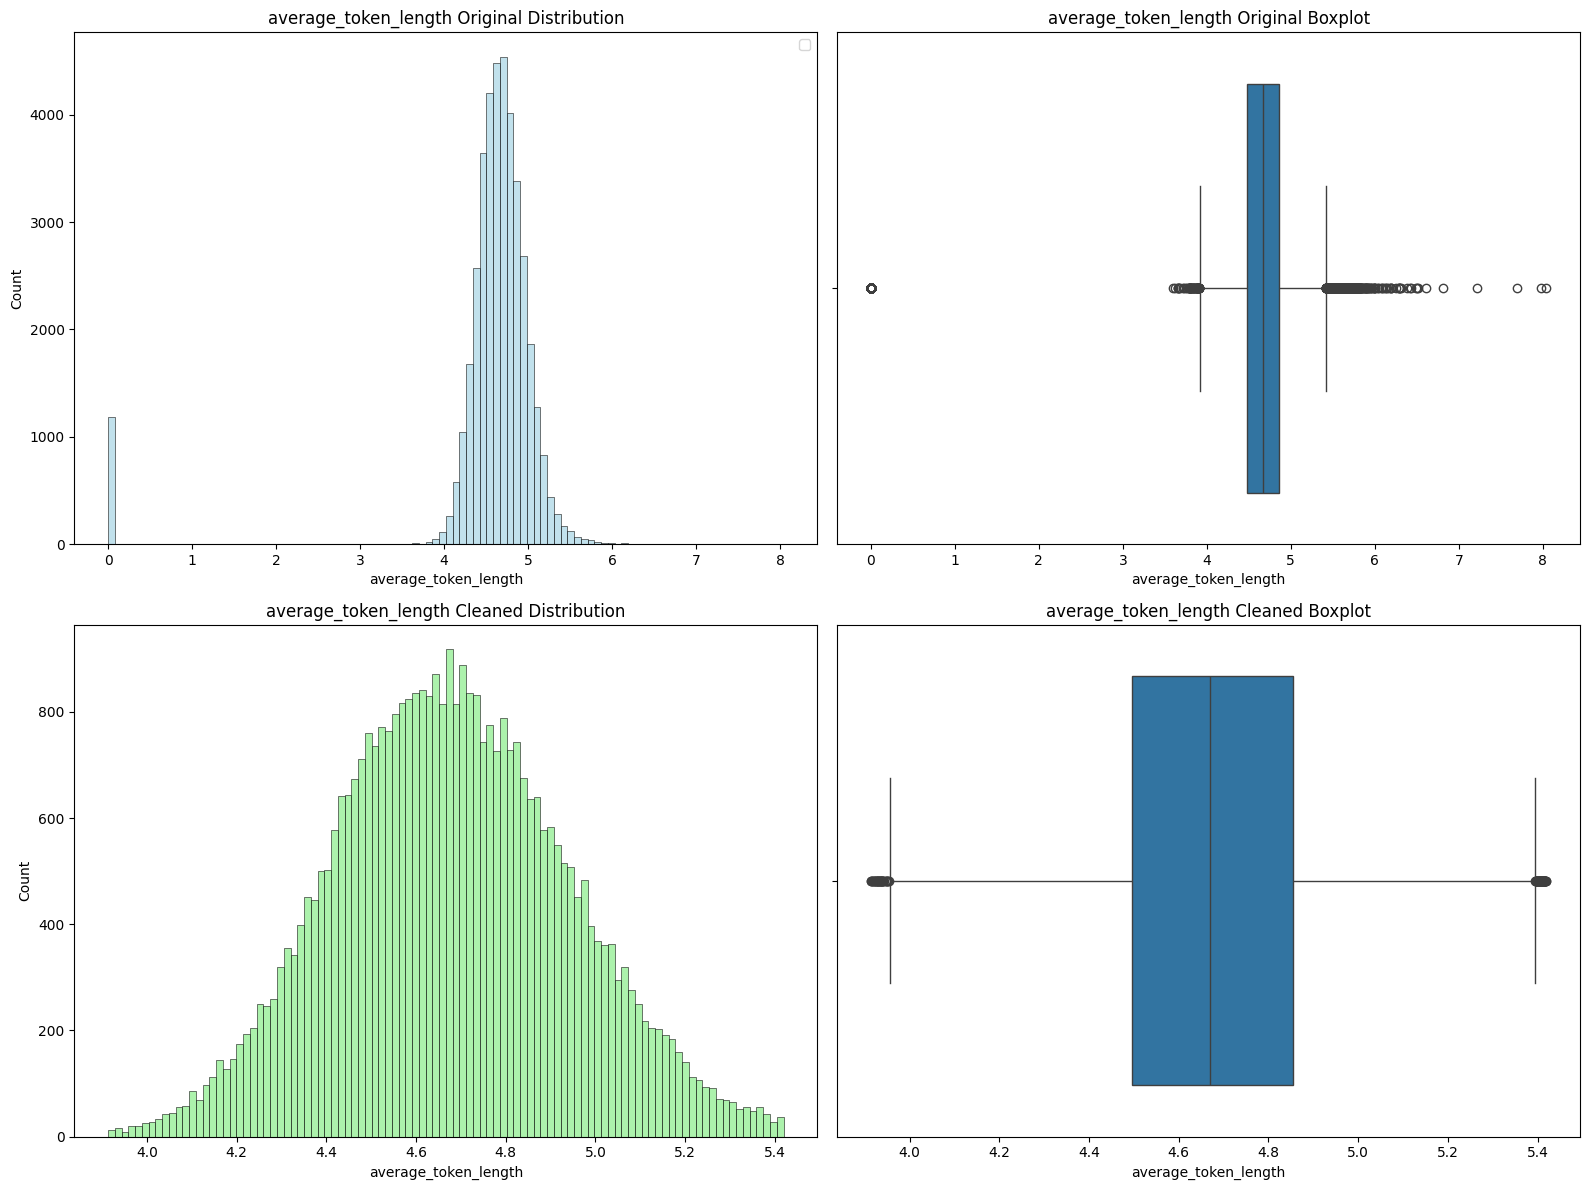

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = df.drop(columns=['url'], inplace=False)

# Function to check for normality using the Shapiro-Wilk test
def is_normal_distribution(data, alpha=0.05):
    stat, p_value = stats.shapiro(data)
    print(p_value)
    return p_value > 0.001  # If p-value > alpha, data is normal

# Function to plot distribution and QQ plot
def plot_distribution_qq(data, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(data, kde=False, ax=axes[0], color='lightblue', bins=100)
    axes[0].set_title(f'{feature_name} Distribution')
    stat, p_value = stats.shapiro(data)
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f'{feature_name} QQ Plot, Shapiro-Wilk test p-value is {p_value:.2e}')

    plt.tight_layout()
    plt.show()

# Function for z-score outlier removal
def remove_outliers_z(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[z_scores < threshold]

# Function for IQR outlier removal
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]

# List of features to skip
features_to_skip = [
    'data_channel_is_lifestyle', 
    'data_channel_is_entertainment',
    'data_channel_is_bus',
    'data_channel_is_socmed',
    'data_channel_is_tech',
    'data_channel_is_world',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend'
]

# Main loop through each feature
for feature in df.columns:
    if feature != 'average_token_length': continue

    # print(f'Processing {feature}')
    if feature == 'average_token_length':
        fig, ax = plt.subplots(1, 1, figsize=(7, 6))  # Create a single subplot
        sns.histplot(df[feature], kde=False, ax=ax, color='lightblue', bins=100)  # Use ax instead of axes[0]
        ax.set_title(f'{feature} Distribution')

        plt.tight_layout()
        plt.show()

        # Plot distribution and QQ plot
        plot_distribution_qq(df[feature], feature)

    # Check if the distribution is normal
    if is_normal_distribution(df[feature]):
        # print(f'{feature} is roughly normally distributed. Using z-score for outlier removal.')

        # Z-score method for outlier removal
        df[feature] = remove_outliers_z(df[feature])
        if feature != 'average_token_length': continue
        # Side-by-side plot: original distribution and cleaned distribution
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=False, color='lightblue', bins=100)
        outliers = df[feature][np.abs(stats.zscore(df[feature])) >= 3]
        plt.scatter(outliers.index, outliers, color='red', label='Outliers')
        plt.title(f'{feature} Original Distribution with Outliers Marked')
        plt.legend()

        plt.subplot(1, 2, 2)
        sns.histplot(df[feature], kde=True, color='lightgreen', bins=100)
        plt.title(f'{feature} Cleaned Distribution')

        plt.tight_layout()
        plt.show()

    else:
        # print(f'{feature} is not normally distributed. Using IQR for outlier removal.')

        # IQR method for outlier removal
        old = df[feature].copy()
        df[feature] = remove_outliers_iqr(df[feature])
        if feature != 'average_token_length': continue
        # Create a 2x2 grid of plots
        plt.figure(figsize=(16, 12))

        # Top row: Original distribution with outliers marked and boxplot
        plt.subplot(2, 2, 1)
        sns.histplot(old, kde=False, color='lightblue', bins=100)
        plt.title(f'{feature} Original Distribution')
        plt.legend()

        plt.subplot(2, 2, 2)
        sns.boxplot(x=old)
        plt.title(f'{feature} Original Boxplot')
      # Bottom row: Cleaned distribution and boxplot
        plt.subplot(2, 2, 3)
        sns.histplot(df[feature], kde=False, color='lightgreen', bins=100)
        plt.title(f'{feature} Cleaned Distribution')

        plt.subplot(2, 2, 4)
        sns.boxplot(x=df[feature])
        plt.title(f'{feature} Cleaned Boxplot')

        plt.tight_layout()
        plt.show()
  


## ✅ Transformation (scaling)

In [39]:
df = df.dropna()

# Select relevant numerical columns for clustering
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Normalize the features
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[numeric_cols])

# Extraction

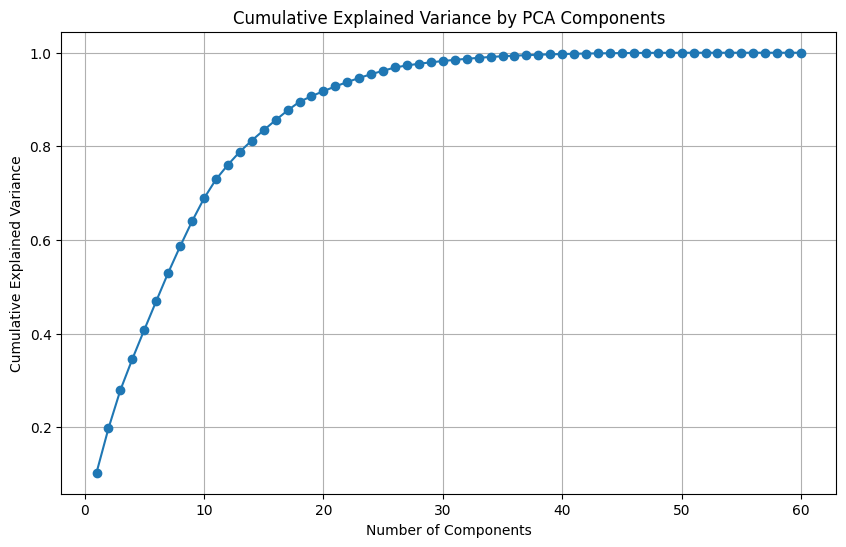

Selected 24 components to retain at least 95% of the variance.


In [40]:
# Step 3: Dimensionality Reduction (show cumulative variance before selecting components)
pca = PCA()
pca_fit = pca.fit(df_normalized)
explained_variance = np.cumsum(pca_fit.explained_variance_ratio_)

# Plot cumulative variance explained by PCA components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Select enough components to retain at least 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1  # Add 1 because of 0-based indexing
pca = PCA(n_components=n_components)
pca_fit = pca.fit(df_normalized)
reduced_data = pca.transform(df_normalized)

print(f'Selected {n_components} components to retain at least 95% of the variance.')

# Selection

Threshold score at 90.0% percentile: 0.51


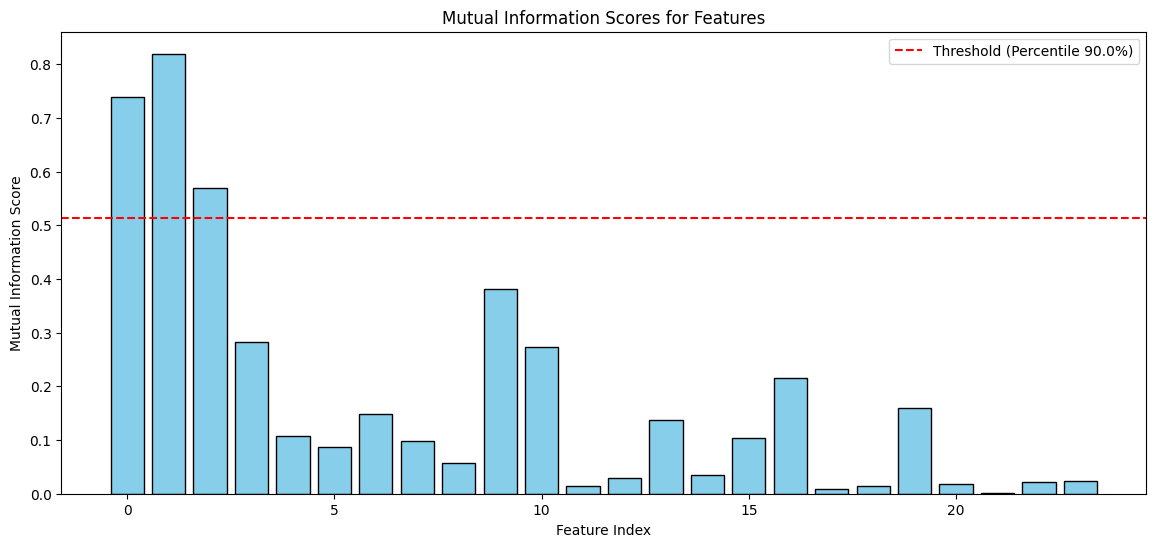

Selected feature indices: [0, 1, 2]
Number of selected features: 3


In [41]:
def filter_feature_selection(data, n_clusters, percentile=0.75):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    mi_scores = mutual_info_classif(data, labels, discrete_features=False)
    threshold_score = np.percentile(mi_scores, percentile * 100)
    print(f"Threshold score at {percentile*100}% percentile: {threshold_score:.2f}")
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(mi_scores)), mi_scores, color='skyblue', edgecolor='black')
    plt.axhline(y=threshold_score, color='red', linestyle='--', label=f'Threshold (Percentile {percentile*100}%)')
    plt.xlabel('Feature Index')
    plt.ylabel('Mutual Information Score')
    plt.title('Mutual Information Scores for Features')
    plt.legend()
    plt.show()
    return [i for i, score in enumerate(mi_scores) if score >= threshold_score]

n_clusters = N_CLUSTERS
percentile = 0.9
selected_features = filter_feature_selection(reduced_data, n_clusters, percentile=percentile)
print(f"Selected feature indices: {selected_features}")
print(f"Number of selected features: {len(selected_features)}")
reduced_data_selected = reduced_data[:, selected_features]

# Sammenlikne performance metric


Evaluating 2 clusters:
Cluster Size 2: {'KMeans': np.float64(3.1621015862837534), 'GaussianMixture': np.float64(3.2343316096840153), 'FuzzyCMeans': np.float64(3.329190752398576)}

Evaluating 3 clusters:
Cluster Size 3: {'KMeans': np.float64(2.334461301906804), 'GaussianMixture': np.float64(2.46309679189419), 'FuzzyCMeans': np.float64(3.0437107380271766)}

Evaluating 4 clusters:
Cluster Size 4: {'KMeans': np.float64(2.2503884395103695), 'GaussianMixture': np.float64(2.283381704534575), 'FuzzyCMeans': np.float64(2.829234939228284)}

Evaluating 5 clusters:
Cluster Size 5: {'KMeans': np.float64(2.1611606457656807), 'GaussianMixture': np.float64(2.165423982546935), 'FuzzyCMeans': np.float64(2.7611824112830434)}

Evaluating 6 clusters:
Cluster Size 6: {'KMeans': np.float64(2.239562709427768), 'GaussianMixture': np.float64(2.217997545916139), 'FuzzyCMeans': np.float64(4.312810375249569)}

Evaluating 7 clusters:
Cluster Size 7: {'KMeans': np.float64(2.247498287253933), 'GaussianMixture': np.f

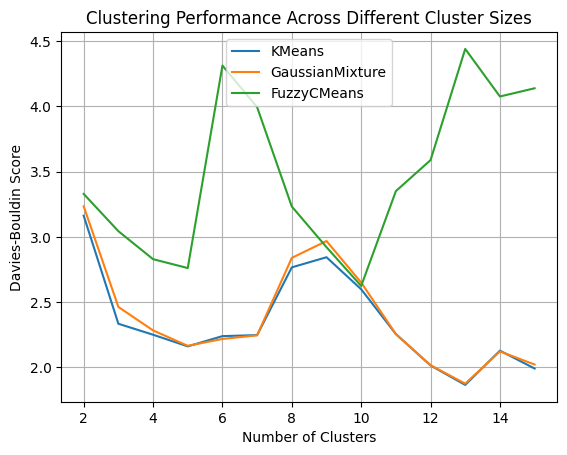

In [44]:
def evaluate_clustering_with_fuzzy(data, max_clusters=10):
    scores = {}
    for n_clusters in range(2, max_clusters + 1):
        print(f"\nEvaluating {n_clusters} clusters:")
        results = {}

        # KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        results['KMeans'] = davies_bouldin_score(data, kmeans_labels)

        # Gaussian Mixture
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm_labels = gmm.fit_predict(data)
        results['GaussianMixture'] = davies_bouldin_score(data, gmm_labels)

        # Fuzzy C-Means
        cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
            data.T, c=n_clusters, m=2, error=1e-5, maxiter=1000, init=None
        )
        fuzzy_labels = np.argmax(u, axis=0)  # Get hard cluster assignments
        if len(set(fuzzy_labels)) > 1:  # Check to avoid calculation error with 1 unique cluster
            results['FuzzyCMeans'] = davies_bouldin_score(data, fuzzy_labels)
        else:
            results['FuzzyCMeans'] = np.nan  # Handle case with no meaningful clustering

        print(f"Cluster Size {n_clusters}: {results}")
        scores[n_clusters] = results

    return scores


# Evaluate clustering performance on selected features
cluster_scores = evaluate_clustering_with_fuzzy(reduced_data, max_clusters=15)

# Visualize performance scores
for method in ['KMeans', 'GaussianMixture', 'FuzzyCMeans']:
    plt.plot(
        list(cluster_scores.keys()), 
        [cluster_scores[k][method] for k in cluster_scores.keys()],
        label=method
    )
    
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Clustering Performance Across Different Cluster Sizes')
plt.legend()
plt.grid()
plt.show()

# Gaussian pca komponent greier

In [43]:


def fuzzy_cmeans_clustering(data, c=N_CLUSTERS, m=2, error=1e-5, maxiter=1000):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, c=c, m=m, error=error, maxiter=maxiter, init=None
    )
    # Get the cluster labels by finding the index of the maximum membership value for each data point
    labels = np.argmax(u, axis=0)
    return labels, cntr

models = {
    "KMeans": KMeans(n_clusters=N_CLUSTERS, random_state=42).fit(reduced_data_selected),
    "hierarchical": AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(reduced_data_selected),
    "DBSCAN": DBSCAN(eps=100, min_samples=1).fit(reduced_data_selected),
    "GaussianMixture": GaussianMixture(n_components=N_CLUSTERS, random_state=42).fit(reduced_data_selected),
    # "som": MiniSom(x=10, y=10, input_len=reduced_data_selected.shape[1], sigma=1.0, learning_rate=0.5), # funka dårlig med de greiene her, ga også rar clustering, så ga f i den
    "FuzzyCMeans": fuzzy_cmeans_clustering(reduced_data_selected)
}

def plot_pca_with_gaussian(models, reduced_data, n_components=3):
    x = np.linspace(reduced_data[:, 0].min(), reduced_data[:, 0].max(), 1000)

    for model_name, model in models.items():
        if model_name == "FuzzyCMeans":
            labels, _ = model  # Unpack the labels and centroids from the fuzzy c-means clustering
        else:
            if hasattr(model, 'labels_'):  # For models like AgglomerativeClustering that don't have a predict method
                labels = model.labels_
            else:
                # Use predict method for models that have it (e.g., KMeans, GaussianMixture)
                labels = model.predict(reduced_data)

        # Plot for the first three selected principal components
        for i in range(min(n_components, reduced_data.shape[1])):
            plt.figure(figsize=(15, 6))
            ax = plt.subplot(1, 3, i + 1)

            # Histogram of data along the i-th principal component
            ax.hist(reduced_data[:, i], bins=30, density=True, alpha=0.6, label=f'Selected PC{i+1} Data', color='lightgray')

            # Plot Gaussian distribution for each cluster
            for cluster in np.unique(labels):
                cluster_data = reduced_data[labels == cluster, i]  # Select the i-th column for the current cluster
                mean = np.mean(cluster_data)
                std_dev = np.std(cluster_data)
                pdf = norm.pdf(x, mean, std_dev)
                ax.plot(x, pdf, label=f'Cluster {cluster} PDF', lw=2)

            ax.set_title(f'Selected PC{i+1} and Clustering Components ({model_name})')
            ax.set_xlabel(f'Selected Principal Component {i+1}')
            ax.set_ylabel('Density')
            ax.legend()

            plt.tight_layout()
            plt.show()

# Example of usage:
plot_pca_with_gaussian(models, reduced_data_selected, n_components=3)

KeyboardInterrupt: 

# tsne

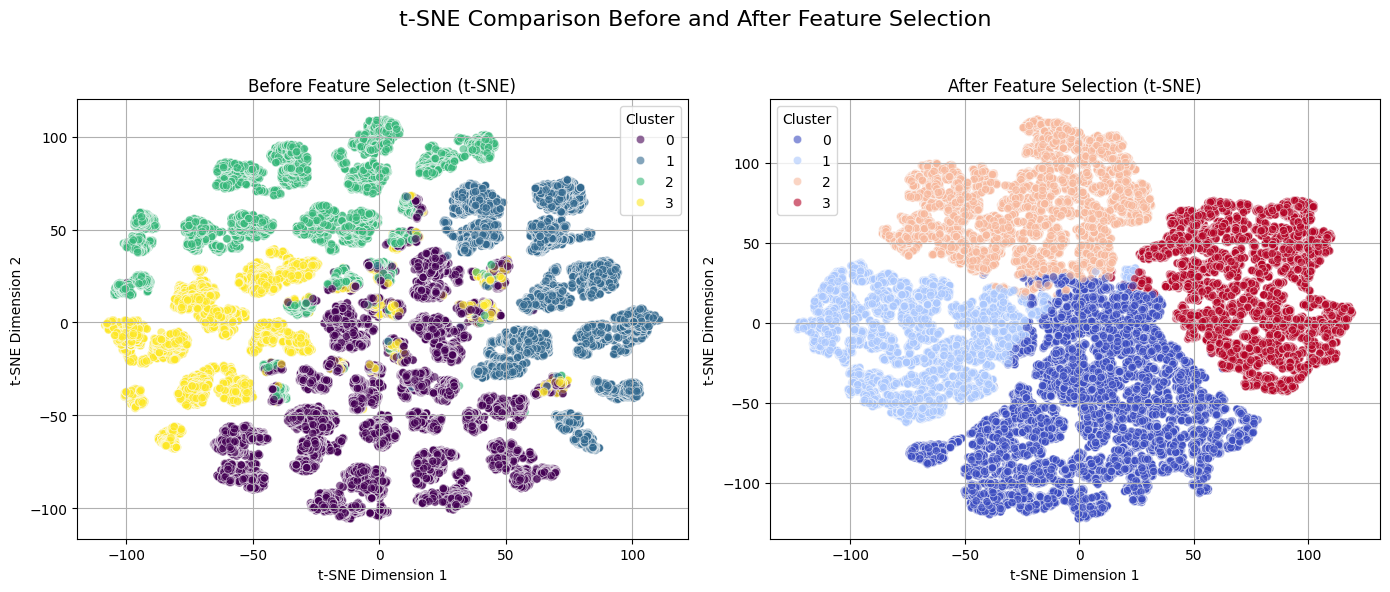

In [ ]:
# Visualization: t-SNE Comparison Before and After Feature Selection
def plot_tsne_comparison(data_full, labels_full, data_selected, labels_selected, title):
    """
    Visualize clustering structure before and after feature selection using t-SNE.

    Parameters:
    - data_full: np.ndarray, full PCA data
    - labels_full: np.ndarray, cluster labels for full data
    - data_selected: np.ndarray, data after feature selection
    - labels_selected: np.ndarray, cluster labels for selected data
    - title: str, overall title for the plot
    """
    tsne_full = TSNE(n_components=2, random_state=42).fit_transform(data_full)
    tsne_selected = TSNE(n_components=2, random_state=42).fit_transform(data_selected)

    plt.figure(figsize=(14, 6))

    # t-SNE for full data
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x=tsne_full[:, 0],
        y=tsne_full[:, 1],
        hue=labels_full,
        palette="viridis",
        alpha=0.6,
    )
    plt.title("Before Feature Selection (t-SNE)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(title="Cluster")
    plt.grid()

    # t-SNE for selected data
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x=tsne_selected[:, 0],
        y=tsne_selected[:, 1],
        hue=labels_selected,
        palette="coolwarm",
        alpha=0.6,
    )
    plt.title("After Feature Selection (t-SNE)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(title="Cluster")
    plt.grid()

    # Add a main title
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Perform clustering on full PCA data
kmeans_full = KMeans(n_clusters=N_CLUSTERS, random_state=42).fit(reduced_data)
labels_full = kmeans_full.labels_

# Perform clustering on selected features
kmeans_selected = KMeans(n_clusters=N_CLUSTERS, random_state=42).fit(reduced_data_selected)
labels_selected = kmeans_selected.labels_

# Plot the comparison
plot_tsne_comparison(
    reduced_data,
    labels_full,
    reduced_data_selected,
    labels_selected,
    "t-SNE Comparison Before and After Feature Selection"
)

# Algoritmer

In [ ]:
# **Algorithm 1: K-means Clustering**
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(reduced_data_selected[:, :3])  # Use the first 3 PCA components for 3D plot

# Evaluate K-means clustering using Davies-Bouldin Index
kmeans_davies_bouldin = davies_bouldin_score(reduced_data_selected[:, :3], df['kmeans_cluster'])
print(f'K-means Davies-Bouldin Index: {kmeans_davies_bouldin:.5f}')

# **Algorithm 4: Gaussian Mixture Model (GMM)**
gmm = GaussianMixture(n_components=N_CLUSTERS, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(reduced_data_selected[:, :3])  # Use the first 3 PCA components for 3D plot

# Evaluate GMM clustering using Davies-Bouldin Index
gmm_davies_bouldin = davies_bouldin_score(reduced_data_selected[:, :3], df['gmm_cluster'])
print(f'GMM Davies-Bouldin Index: {gmm_davies_bouldin:.5f}')

# # **Algorithm 6: Fuzzy C-Means Clustering**
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(reduced_data_selected.T, c=N_CLUSTERS, m=2, error=1e-5, maxiter=1000, init=None)

# Assign cluster labels to the DataFrame
df['fuzzy_cmeans_cluster'] = np.argmax(u, axis=0)

# Evaluate Fuzzy C-Means clustering using Davies-Bouldin Index
if len(set(df['fuzzy_cmeans_cluster'])) > 1:
    fuzzy_cmeans_davies_bouldin = davies_bouldin_score(reduced_data_selected[:, :3], df['fuzzy_cmeans_cluster'])
    print(f'Fuzzy C-Means Davies-Bouldin Index: {fuzzy_cmeans_davies_bouldin:.5f}')
else:
    print('Fuzzy C-Means did not find any clusters (only noise).')

K-means Davies-Bouldin Index: 0.53629
GMM Davies-Bouldin Index: 0.54939
Fuzzy C-Means Davies-Bouldin Index: 0.53543


# Plotting

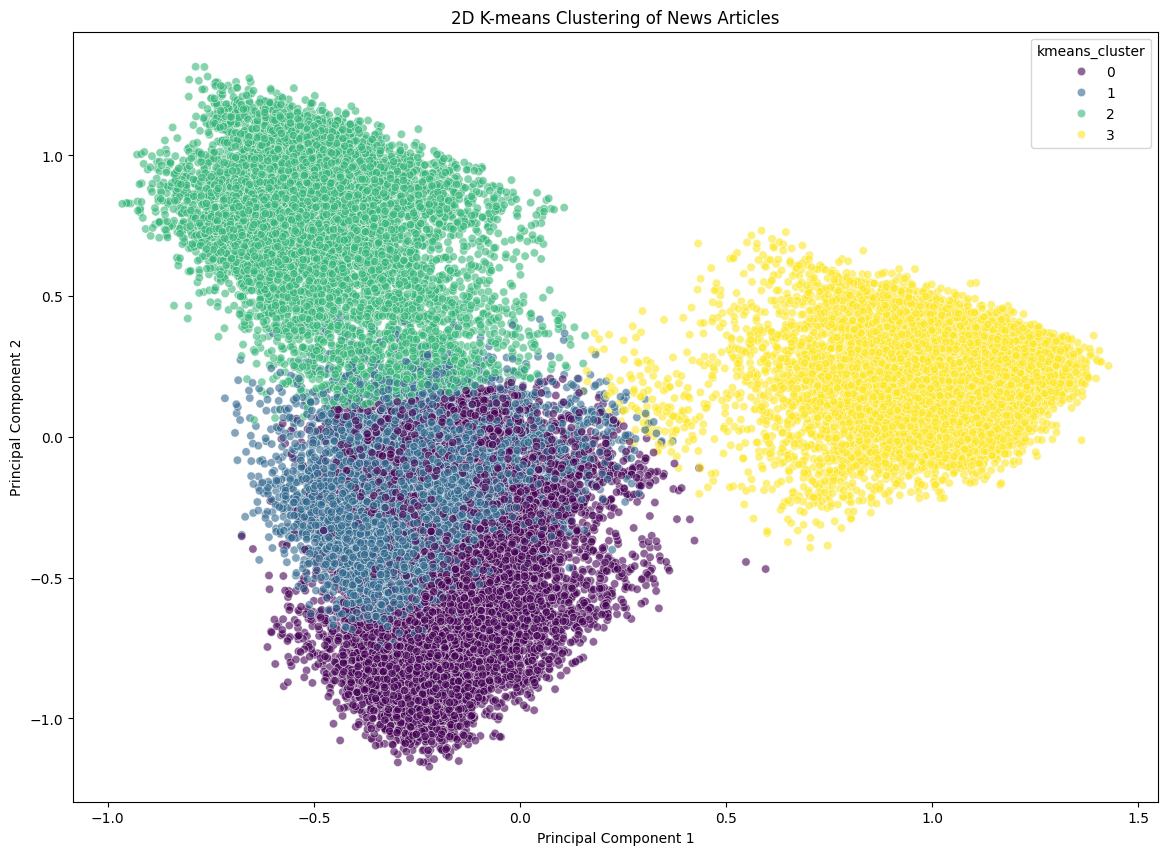

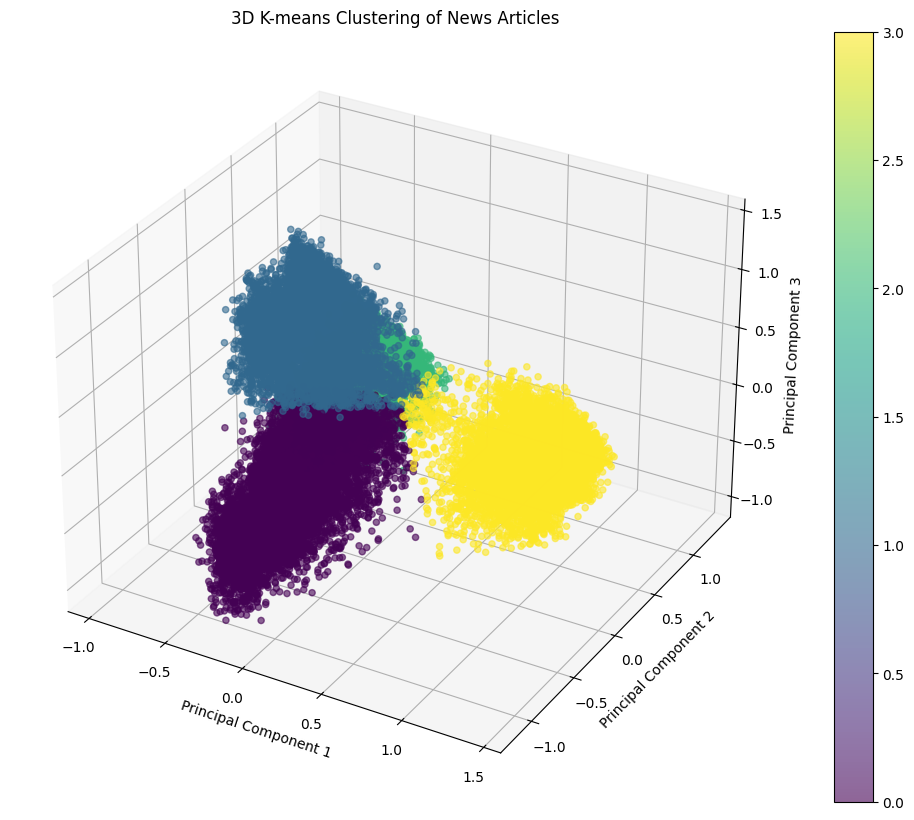

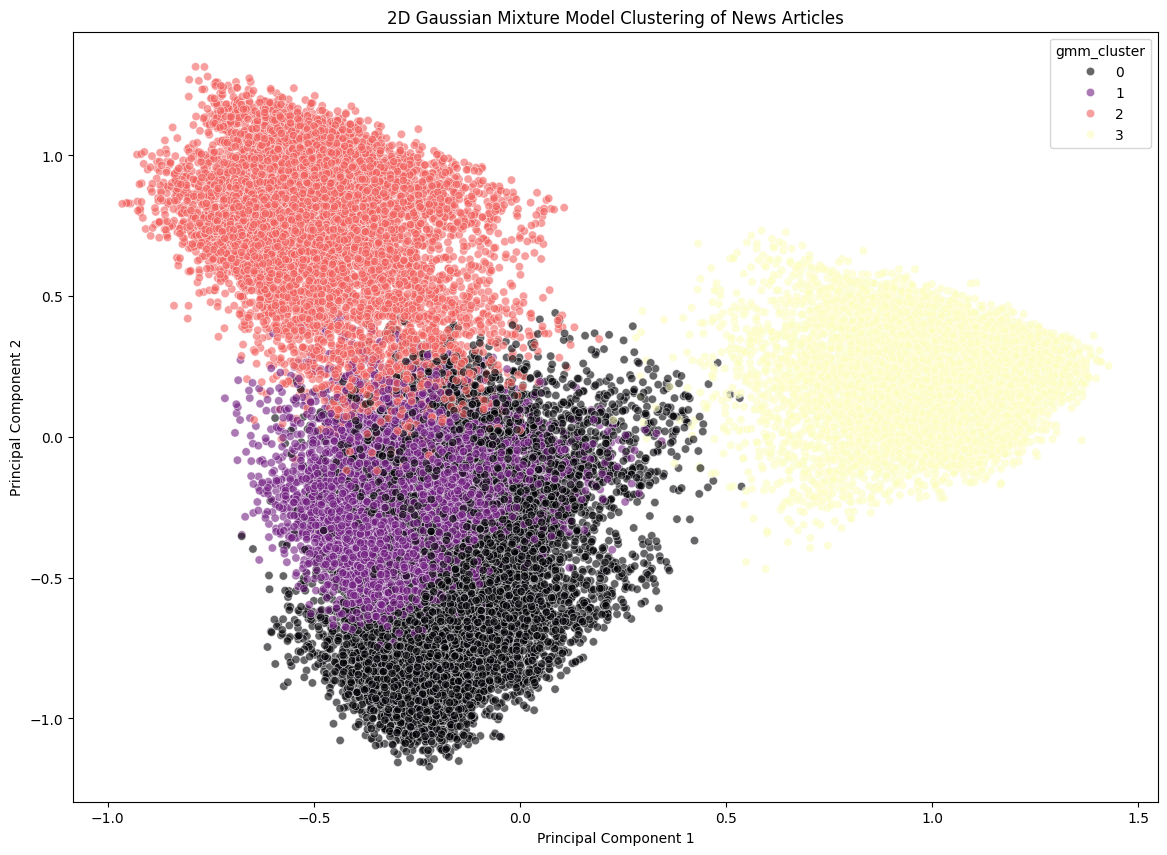

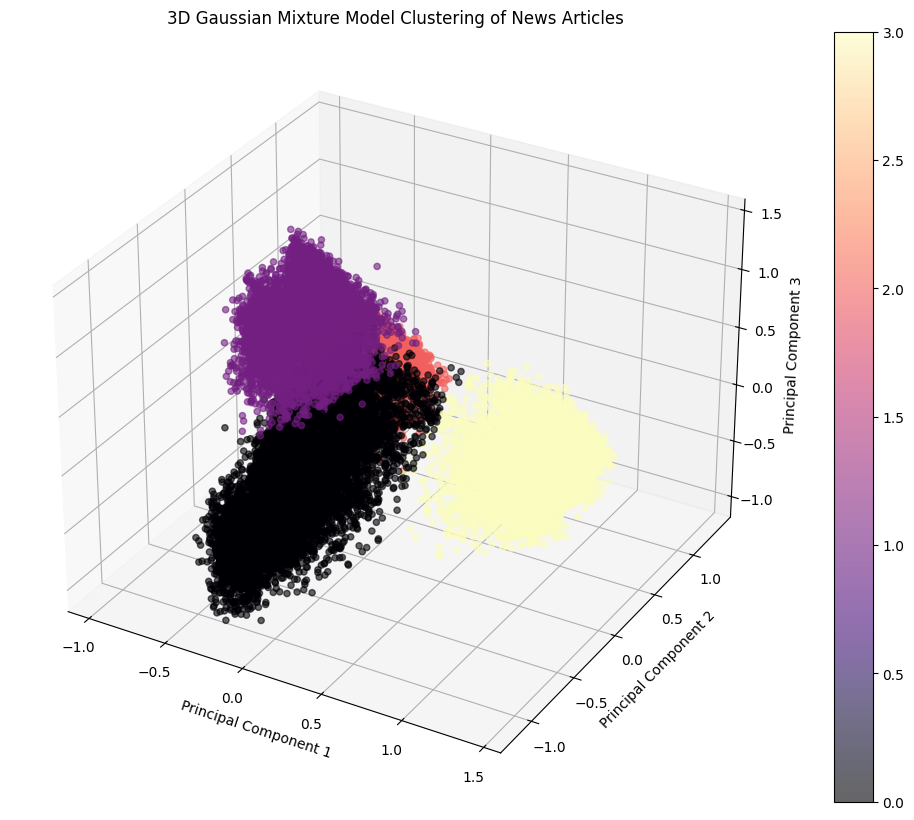

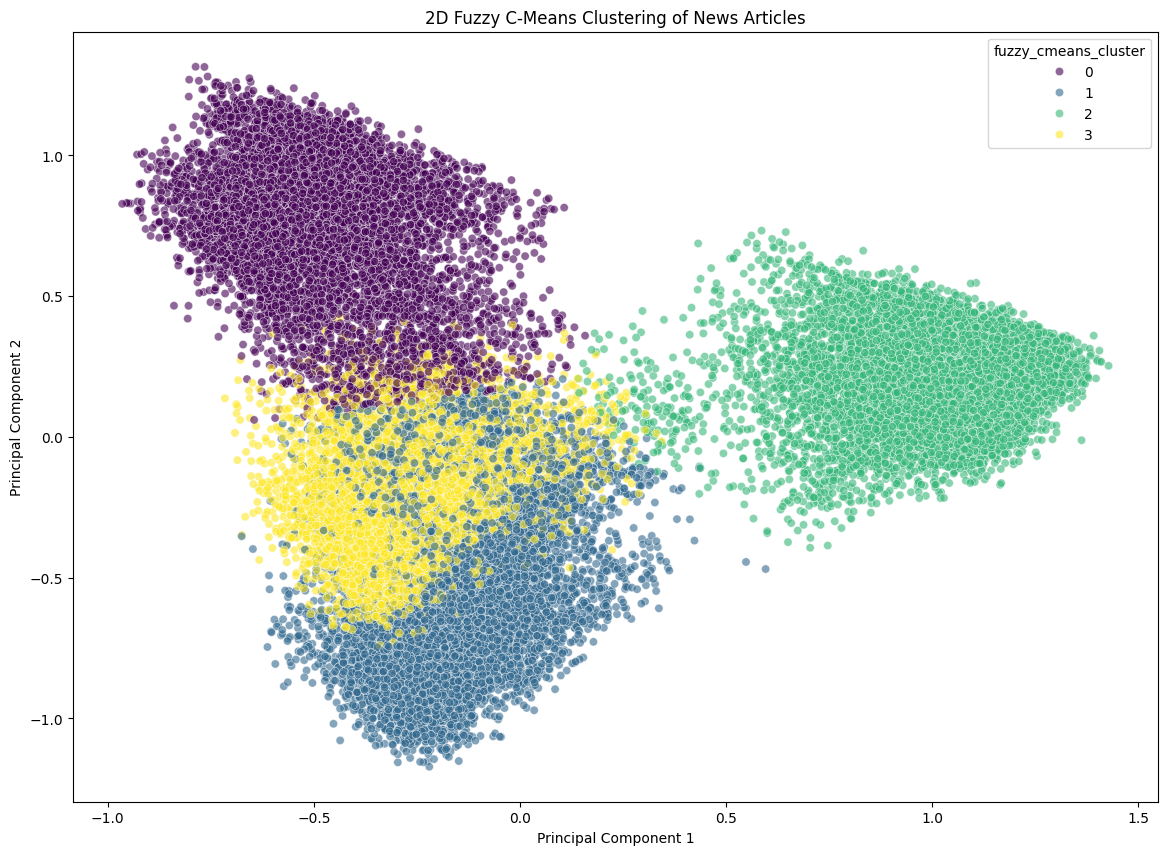

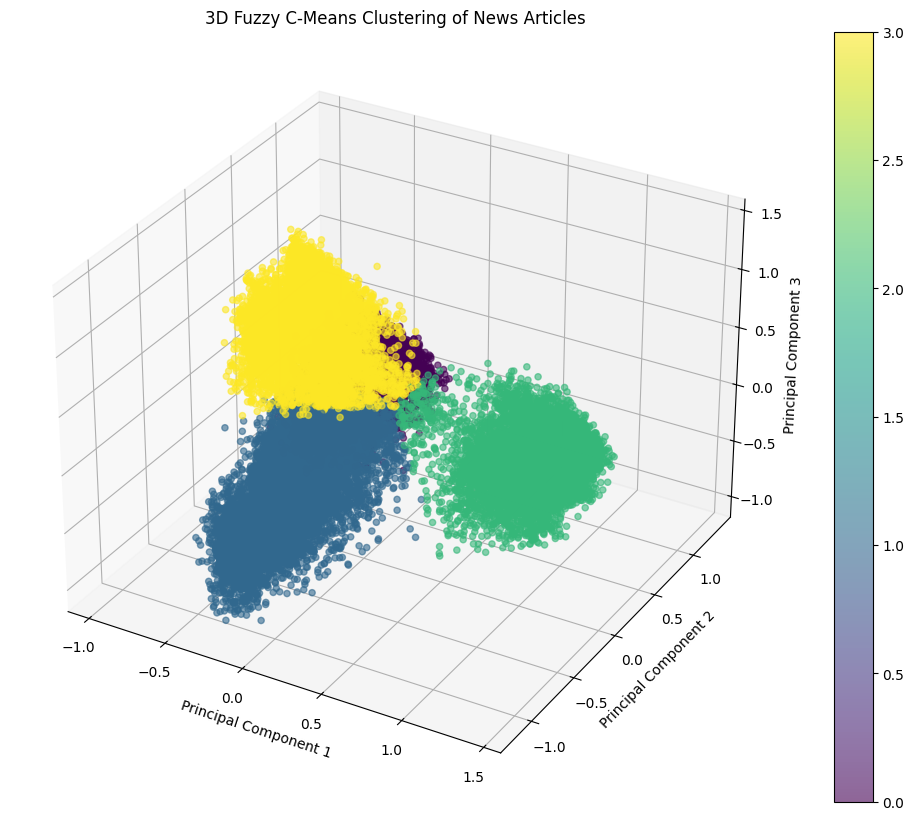

In [ ]:
# 2D K-means plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=reduced_data_selected[:, 0], y=reduced_data_selected[:, 1], hue=df['kmeans_cluster'], palette='viridis', alpha=0.6)
plt.title('2D K-means Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 3D K-means plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data_selected[:, 0], reduced_data_selected[:, 1], reduced_data_selected[:, 2], c=df['kmeans_cluster'], cmap='viridis', alpha=0.6)
plt.title('3D K-means Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc)
plt.show()

# 2D GMM plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=reduced_data_selected[:, 0], y=reduced_data_selected[:, 1], hue=df['gmm_cluster'], palette='magma', alpha=0.6)
plt.title('2D Gaussian Mixture Model Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 3D GMM plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data_selected[:, 0], reduced_data_selected[:, 1], reduced_data_selected[:, 2], c=df['gmm_cluster'], cmap='magma', alpha=0.6)
plt.title('3D Gaussian Mixture Model Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc)
plt.show()

# 2D Fuzzy C-Means plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=reduced_data_selected[:, 0], y=reduced_data_selected[:, 1], hue=df['fuzzy_cmeans_cluster'], palette='viridis', alpha=0.6)
plt.title('2D Fuzzy C-Means Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 3D Fuzzy C-Means plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data_selected[:, 0], reduced_data_selected[:, 1], reduced_data_selected[:, 2], c=df['fuzzy_cmeans_cluster'], cmap='viridis', alpha=0.6)
plt.title('3D Fuzzy C-Means Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc)
plt.show()